### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

#### Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Scikit-learn

In [2]:
# import scikit-learn
from sklearn.datasets import load_iris # datasets of iris
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [3]:
iris = load_iris()

In [10]:
print(iris.data)
print(iris.data.shape)
print(iris.feature_names)

print(iris.target)
print(iris.target.shape)
print(iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

#### Pandas

In [15]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_target_df = pd.DataFrame(iris.target, columns=['types'])

In [18]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
iris_target_df.head(5)

,types
0,0
1,0
2,0
3,0
4,0


In [20]:
iris_all_df = pd.concat([iris_df, iris_target_df], axis=1)

In [21]:
iris_all_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),types
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [22]:
iris_all_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),types
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [23]:
explain_train, explain_test, target_train, target_test = train_test_split(iris_df, iris_target_df, test_size=0.33)

In [27]:
explain_train.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
53,5.5,2.3,4.0,1.3
19,5.1,3.8,1.5,0.3
112,6.8,3.0,5.5,2.1
51,6.4,3.2,4.5,1.5
141,6.9,3.1,5.1,2.3
52,6.9,3.1,4.9,1.5
10,5.4,3.7,1.5,0.2
79,5.7,2.6,3.5,1.0
9,4.9,3.1,1.5,0.1
1,4.9,3.0,1.4,0.2


In [28]:
explain_test.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
57,4.9,2.4,3.3,1.0
139,6.9,3.1,5.4,2.1
125,7.2,3.2,6.0,1.8
26,5.0,3.4,1.6,0.4
104,6.5,3.0,5.8,2.2
4,5.0,3.6,1.4,0.2
140,6.7,3.1,5.6,2.4
11,4.8,3.4,1.6,0.2
36,5.5,3.5,1.3,0.2
24,4.8,3.4,1.9,0.2


In [30]:
target_train.head(10)

,types
53,1
19,0
112,2
51,1
141,2
52,1
10,0
79,1
9,0
1,0


In [32]:
target_test.head(10)

,types
57,1
139,2
125,2
26,0
104,2
4,0
140,2
11,0
36,0
24,0


In [34]:
explain_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,100.000000,100.00000,100.000000,100.000000
mean,5.838000,3.02300,3.749000,1.176000
std,0.823981,0.42256,1.738076,0.742521
min,4.400000,2.00000,1.000000,0.100000
25%,5.100000,2.80000,1.500000,0.300000
50%,5.800000,3.00000,4.350000,1.300000
75%,6.400000,3.30000,5.000000,1.800000
max,7.700000,4.20000,6.900000,2.500000


In [36]:
explain_test.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.00000,50.000000,50.000000
mean,5.85400,3.12600,3.776000,1.246000
std,0.84448,0.45795,1.836318,0.805899
min,4.30000,2.20000,1.100000,0.100000
25%,5.10000,2.90000,1.600000,0.400000
50%,5.90000,3.10000,4.350000,1.400000
75%,6.47500,3.40000,5.375000,1.975000
max,7.90000,4.40000,6.600000,2.500000


#### Data Visialization

petal(がく片)の長さと幅をプロットした結果 → setosaは綺麗に分類できそうだが、versicolor, virginicaの分類は中々難しそう

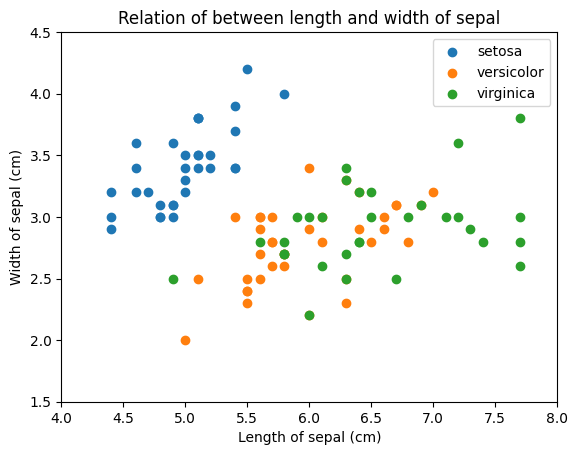

In [54]:
plt.scatter(explain_train[target_train["types"]==0]["sepal length (cm)"], explain_train[target_train["types"]==0]["sepal width (cm)"], label="setosa", cmap="rgb")
plt.scatter(explain_train[target_train["types"]==1]["sepal length (cm)"], explain_train[target_train["types"]==1]["sepal width (cm)"], label="versicolor", cmap="rgb")
plt.scatter(explain_train[target_train["types"]==2]["sepal length (cm)"], explain_train[target_train["types"]==2]["sepal width (cm)"], label="virginica", cmap="rgb")

# 各軸の範囲設定
plt.xlim(4, 8)
plt.ylim(1.5, 4.5)

plt.xlabel('Length of sepal (cm)')
plt.ylabel('Width of sepal (cm)')

plt.title('Relation of between length and width of sepal')
plt.legend()

petal(花びら)の長さと幅をプロットしてみた結果 → いい感じに分類できそう

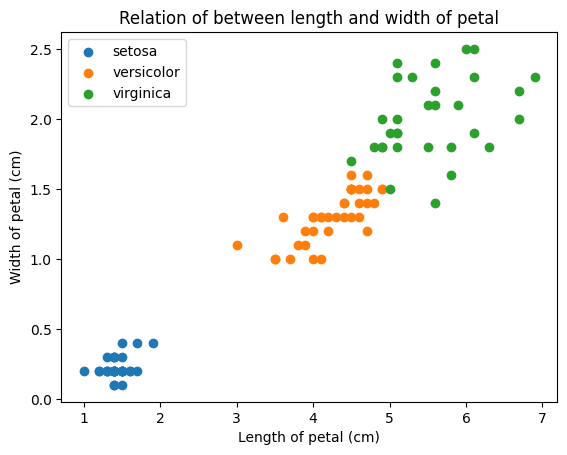

In [52]:
plt.scatter(explain_train[target_train["types"]==0]["petal length (cm)"], explain_train[target_train["types"]==0]["petal width (cm)"], label="setosa", cmap="rgb")
plt.scatter(explain_train[target_train["types"]==1]["petal length (cm)"], explain_train[target_train["types"]==1]["petal width (cm)"], label="versicolor", cmap="rgb")
plt.scatter(explain_train[target_train["types"]==2]["petal length (cm)"], explain_train[target_train["types"]==2]["petal width (cm)"], label="virginica", cmap="rgb")

# 各軸の範囲設定
# plt.xlim(4, 8)
# plt.ylim(1.5, 4.5)

plt.xlabel('Length of petal (cm)')
plt.ylabel('Width of petal (cm)')

plt.title('Relation of between length and width of petal')
plt.legend()

#### LinearSVC

In [62]:
sepal_df_train = explain_train.loc[:, ['sepal length (cm)', 'sepal width (cm)']]
petal_df_train = explain_train.loc[:, ['petal length (cm)', 'petal width (cm)']]

In [63]:
sepal_df_train.head(5)

,sepal length (cm),sepal width (cm)
53,5.5,2.3
19,5.1,3.8
112,6.8,3.0
51,6.4,3.2
141,6.9,3.1


In [64]:
petal_df_train.head(5)

,petal length (cm),petal width (cm)
53,4.0,1.3
19,1.5,0.3
112,5.5,2.1
51,4.5,1.5
141,5.1,2.3


In [69]:
# Create model
sepal_model = LinearSVC()
petal_model = LinearSVC()

# Train model
# sepalの長さ、幅がこの値の時は何に分類されるか？を学習させていく
sepal_model.fit(sepal_df_train, target_train)
# petalの長さ、幅がこの値の時は何に分類されるか？を学習させていく
petal_model.fit(petal_df_train, target_train)

# Inference
sepal_predict = sepal_model.predict(explain_test.loc[:, ['sepal length (cm)', 'sepal width (cm)']])
petal_predict = petal_model.predict(explain_test.loc[:, ['petal length (cm)', 'petal width (cm)']])

#### モデルの品質評価

In [70]:
from sklearn.metrics import accuracy_score

sepal_score = accuracy_score(target_test, sepal_predict)
petal_score = accuracy_score(target_test, petal_predict)

In [71]:
print('accuracy_score_of_sepal: {}'.format(sepal_score))
print('acciracy_score_of_petal: {}'.format(petal_score))

accuracy_score_of_sepal: 0.88
acciracy_score_of_petal: 0.92
